# **1. Perkenalan Dataset**


**Sumber Dataset**:  
https://www.kaggle.com/datasets/oktayrdeki/heart-disease/data  
  Dataset ini adalah dataset publik dari Kaggle untuk menganalisis dan memprediksi risiko penyakit jantung pada seseorang berdasarkan faktor demografi, indikator klinis, gaya hidup, dan riwayat keluarga


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import seaborn as sns
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('heart_raw.csv')
print(f"Ukuran dataset: {df.shape}")
df.head()

Ukuran dataset: (10000, 21)


,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [3]:
print("Informasi Dataset")
df.info()

Informasi Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Su

In [4]:
print("Statistik Deskriptif")
df.describe()

Statistik Deskriptif


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


In [5]:
print("Total missing values :")
df.isnull().sum()

Total missing values :


,0
Age,29
Gender,19
Blood Pressure,19
Cholesterol Level,30
Exercise Habits,25
Smoking,25
Family Heart Disease,21
Diabetes,30
BMI,22
High Blood Pressure,26


In [6]:
print("Total data duplicate :")
df.duplicated().sum()

Total data duplicate :


np.int64(0)


Target Variable Distribution:
Heart Disease Status
No     8000
Yes    2000
Name: count, dtype: int64

Percentage:
Heart Disease Status
No     80.0
Yes    20.0
Name: proportion, dtype: float64


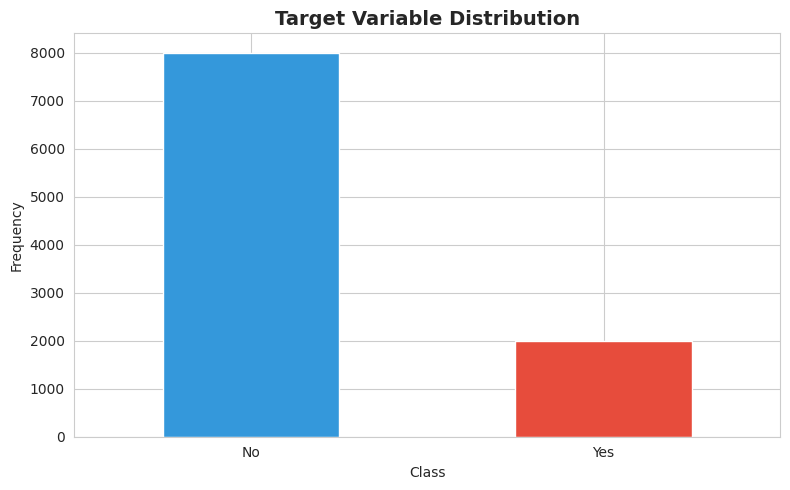

In [7]:
# Distribusi Heart Disease Status
print("\nTarget Variable Distribution:")
target_col = df.columns[-1]
print(df[target_col].value_counts())
print(f"\nPercentage:")
print(df[target_col].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
df[target_col].value_counts().plot(kind='bar', color=['#3498db', '#e74c3c'])
plt.title('Target Variable Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Correlation Matrix:


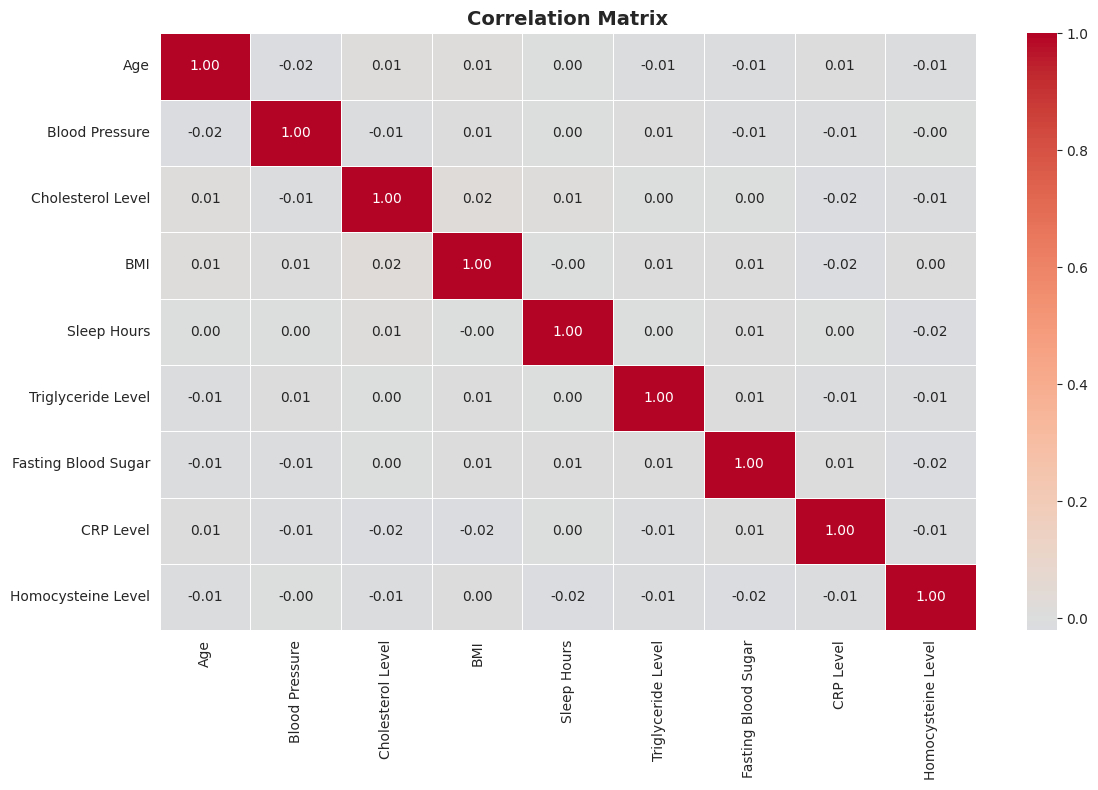

In [8]:
# Correlation Matrix
print("\nCorrelation Matrix:")
df_numeric = df.select_dtypes(include=['int64', 'float64'])
correlation = df_numeric.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


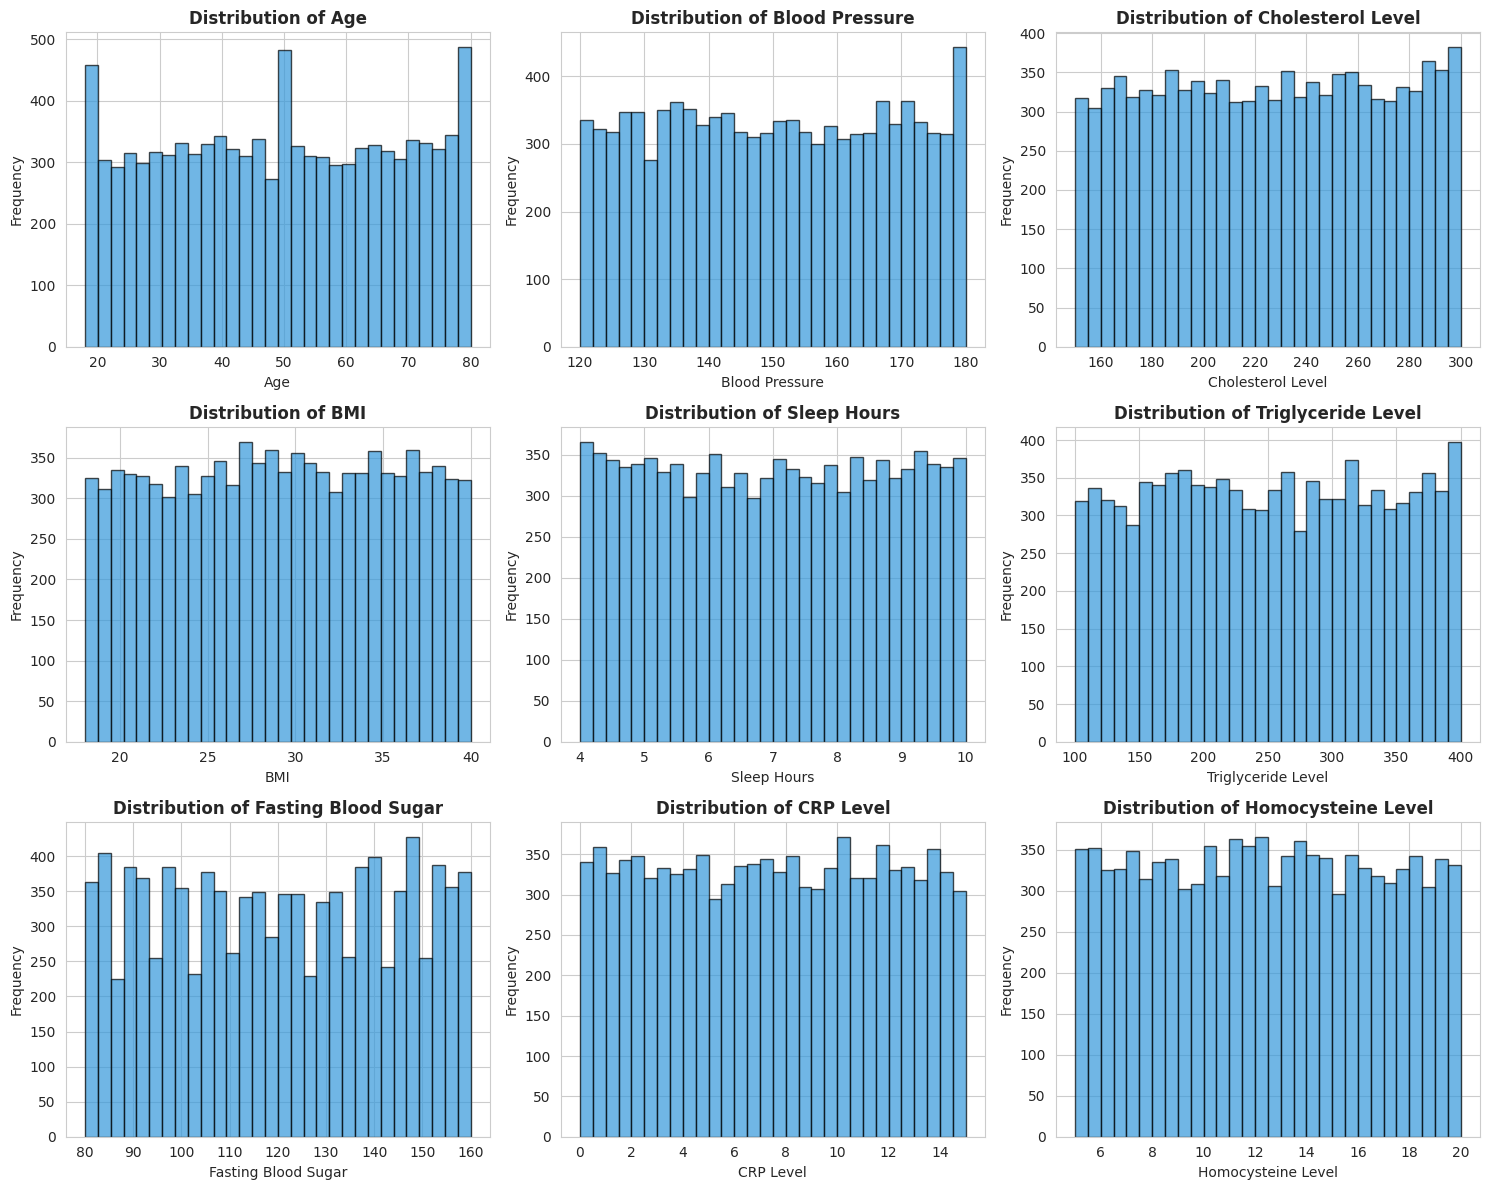

In [9]:
if target_col in correlation.columns:
    print("\nCorrelation with Target Variable:")
    target_corr = correlation[target_col].sort_values(ascending=False)
    print(target_corr)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
n_cols = len(numerical_cols)
n_rows = (n_cols + 2) // 3

plt.figure(figsize=(15, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, idx)
    df[col].hist(bins=30, color='#3498db', alpha=0.7, edgecolor='black')
    plt.title(f'Distribution of {col}', fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

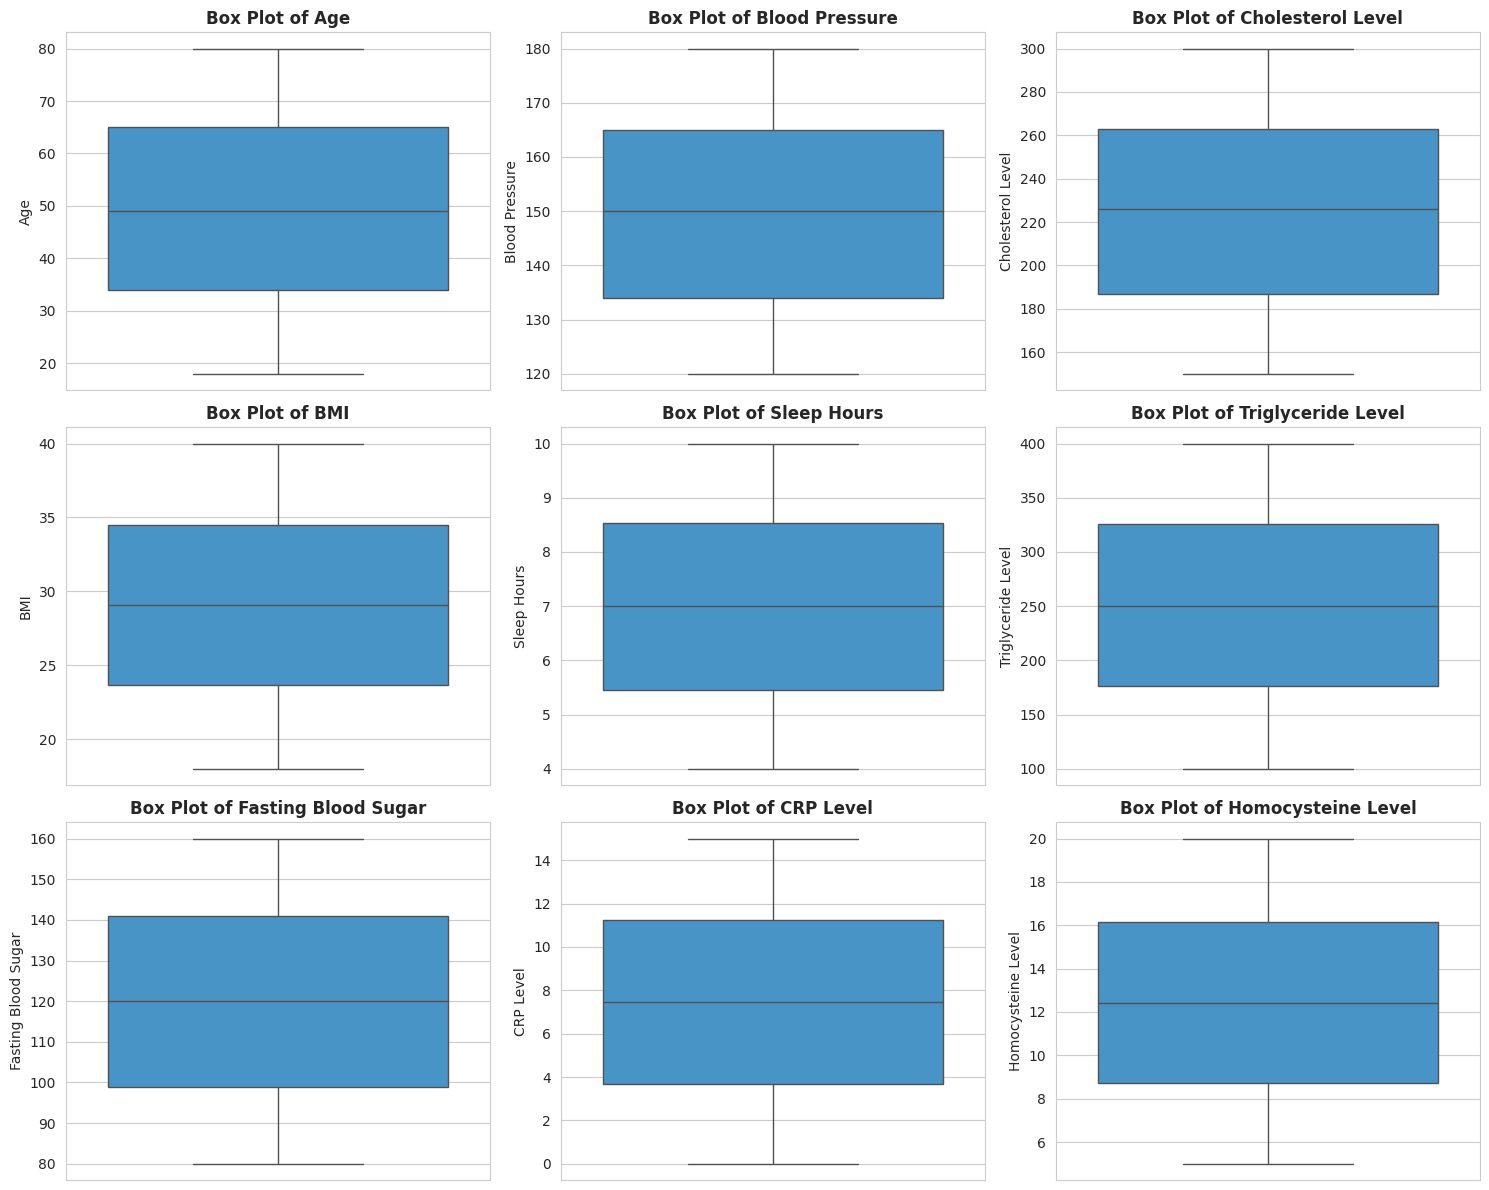

In [10]:
# Deteksi Outlier
plt.figure(figsize=(15, n_rows * 4))
for idx, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, 3, idx)
    sns.boxplot(y=df[col], color='#3498db')
    plt.title(f'Box Plot of {col}', fontweight='bold')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [11]:
df_clean = df.copy()


In [12]:
# Menangani Missing Values
if df_clean.isnull().sum().sum() > 0:
    # Untuk kolom angka: gunakan median
    for col in df_clean.select_dtypes(include=['int64', 'float64']).columns:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

    # Untuk kolom teks: gunakan modus
    for col in df_clean.select_dtypes(include=['object']).columns:
        if df_clean[col].isnull().sum() > 0:
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

    print("Missing values handled")
else:
    print("No missing values found")

Missing values handled


In [13]:
# Menghapus Data Duplikat
if df_clean.duplicated().sum() > 0:
    df_clean = df_clean.drop_duplicates()
    df_clean = df_clean.reset_index(drop=True)
    print("Duplicates data removed")
else:
    print("No duplicate data found")

No duplicate data found


In [14]:
# Deteksi dan Penanganan Outlier

def remove_outliers_iqr(df, columns):
    df_out = df.copy()
    for col in columns:
        Q1 = df_out[col].quantile(0.25)
        Q3 = df_out[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_out = df_out[(df_out[col] >= lower_bound) & (df_out[col] <= upper_bound)]
    return df_out

numerical_cols_no_target = [col for col in numerical_cols if col != target_col]
df_before_outlier = df_clean.shape[0]
df_clean = remove_outliers_iqr(df_clean, numerical_cols_no_target)
df_after_outlier = df_clean.shape[0]

print(f"Outliers removed: {df_before_outlier - df_after_outlier} rows")
print(f"Remaining data: {df_after_outlier} rows")


Outliers removed: 0 rows
Remaining data: 10000 rows


In [15]:
# Encoding Data Kategorikal

# Split data

X = df_clean.drop(columns=[target_col])
y = df_clean[target_col]

categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
if len(categorical_cols) > 0:
    print(f"Categorical columns found: {categorical_cols}")
    X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    print(f"Encoding completed. New shape: {X_encoded.shape}")
else:
    X_encoded = X.copy()
    print("No categorical columns found")


Categorical columns found: ['Gender', 'Exercise Habits', 'Smoking', 'Family Heart Disease', 'Diabetes', 'High Blood Pressure', 'Low HDL Cholesterol', 'High LDL Cholesterol', 'Alcohol Consumption', 'Stress Level', 'Sugar Consumption']
Encoding completed. New shape: (10000, 24)


In [16]:
print(f"Before SMOTE: {y.value_counts().to_dict()}")

smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_encoded, y)

print(f"After SMOTE: {pd.Series(y_balanced).value_counts().to_dict()}")


Before SMOTE: {'No': 8000, 'Yes': 2000}
After SMOTE: {'No': 8000, 'Yes': 8000}


In [17]:
# Normalisasi atau Standardisasi Fitur
numerical_features = X_balanced.select_dtypes(include=['int64', 'float64']).columns.tolist()

scaler = StandardScaler()
X_scaled = X_balanced.copy()
X_scaled[numerical_features] = scaler.fit_transform(X_balanced[numerical_features])

print("Feature scaling completed")



Feature scaling completed


In [18]:
df_preprocessed = pd.concat([X_scaled, pd.Series(y_balanced, name=target_col).reset_index(drop=True)], axis=1)

print("\n" + "="*60)
print("PREPROCESSING SUMMARY")
print("="*60)
print(f"Initial data: {df.shape[0]} rows")
print(f"After cleaning and outlier removal: {df_after_outlier} rows")
print(f"After SMOTE balancing: {df_preprocessed.shape[0]} rows")

print("\nFirst 5 rows after preprocessing:")
df_preprocessed.head()




PREPROCESSING SUMMARY
Initial data: 10000 rows
After cleaning and outlier removal: 10000 rows
After SMOTE balancing: 16000 rows

First 5 rows after preprocessing:


,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Gender_Male,...,High Blood Pressure_Yes,Low HDL Cholesterol_Yes,High LDL Cholesterol_Yes,Alcohol Consumption_Low,Alcohol Consumption_Medium,Stress Level_Low,Stress Level_Medium,Sugar Consumption_Low,Sugar Consumption_Medium,Heart Disease Status
0,0.382020,0.203757,-1.634940,-0.702379,0.399588,1.044601,-0.008604,1.359377,-0.019969,True,...,True,True,False,False,False,False,True,False,True,No
1,1.112855,-0.204052,1.400377,-0.663824,1.078050,-1.355942,1.582445,0.470335,1.679411,False,...,False,True,False,False,True,False,False,False,True,No
2,-0.180161,-1.369220,-0.221548,0.112227,-1.550516,1.630379,-1.212642,1.295569,-0.304278,True,...,False,True,True,True,False,True,False,True,False,No
3,-0.967214,-1.602254,1.562569,-0.846600,-1.056413,0.481794,-1.126639,1.246164,-1.599774,False,...,True,False,True,True,False,False,False,False,False,No
4,0.606892,0.961116,0.380881,-1.456934,0.031739,0.137219,1.453441,0.722709,-1.060838,True,...,True,False,False,True,False,False,False,False,False,No


In [19]:
output_path = 'heart_disease_preprocessing.csv'
df_preprocessed.to_csv(output_path, index=False)
print(f"\nPreprocessed dataset saved to: {output_path}")


Preprocessed dataset saved to: heart_disease_preprocessing.csv
